#IMPORTAR BASE DE DATOS
Para empezar, volví a conectarme con mi dirve, usando el código de la anterior entrega. Luego, añadí los instruídos en la guía semanal para:

1) conectarme a la base de datos

2) Crear un query y llevarlo a un dataframe

3) Una vez traídos todos los datos, mostrarlos en una tabla limitadamente.

In [1]:
##1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
##1
import sqlite3
import pandas as pd

# Conectarse a la base de datos
connection = sqlite3.connect('/content/drive/MyDrive/music_smaller_10000.db')
connection

In [3]:
##2
# Crear el query entre comillas y transformaarlos en una dataframe
query = "SELECT * FROM playlists"
datos = pd.read_sql_query(query, connection)

##3
# Mostrar cómo queda el archivo
print(datos.head())


   slice  pid  modified_at  num_tracks  num_albums  num_followers  num_edits  \
0  0-999    0   1493424000          52          47              1          6   
1  0-999    1   1506556800          39          23              1          5   
2  0-999    2   1505692800          64          51              1         18   
3  0-999    3   1501027200         126         107              1          4   
4  0-999    4   1401667200          17          16              2          7   

   duration_ms  num_artists  
0     11532414           37  
1     11656470           21  
2     14039958           31  
3     28926058           86  
4      4335282           16  


##PREGUNTA 1

¿Cómo es la distribución de la duración de las canciones en todas las playlists?

Tipo de gráfico: Histograma

Inicialmente, al correr el histograma, no me daban los resultados porque había mucha variación entre las duraciones mínimas y máximas de las canciones. Entonces, añadí en el código la instrucción que estas duraran menos de 8min para que pudieran verse más claramente los datos.

1) Creé un query para traer la tabla de song incluyendo solamente los datos que duren menos de 500,000 segundos o (8.33min).

2) Pedí que me mostrara los primeros datos de la tabla para saber cuál es la columna que me servía.

3) Ordené que me describiera las variables, para asegurarme que la diferencia entre las canciones no fuera demasiado grande y me volviera a salir mal el gráfico

4) Creé el histograma con el parámetro "bins=50" para que me muestre 50 barritas.

5) Le añadí al histograma un título e importé el paquete Seaborn para que se viera más bonito.

6) Le pedí a Chat gpt que me hiciera un degradé, porque solo cambiando la paleta de colores seguía mostrando el mismo azul aburrido :(. Quedó una maravilla. Sin embargo, vale aclarar que los colores en este gráfico particular no me están diciendo nada, y fue sólo un capricho aesthetic.



In [4]:
##1
# Crear el query entre comillas y transformaarlos en una dataframe
query = "SELECT * FROM song WHERE duration_ms<500000"
song = pd.read_sql_query(query, connection)



In [ ]:
##1
500000/(1000*60)

8.333333333333334

In [ ]:
##2
song.head()

,track_uri,pid,pos,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name
0,spotify:track:4SDywo3ykB2PEthjXvo1UP,6,0,Creedence Clearwater Revival,spotify:artist:3IYUhFvPQItj6xySrBmZkd,I Put A Spell On You,spotify:album:7oIftk0P8cViwNpNEdCYl2,271786,Creedence Clearwater Revival
1,spotify:track:229SqGbacrLSBfb9XfJczF,6,1,STRFKR,spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU,Bury Us Alive,spotify:album:5pfqk4oFycMVynOD8S2Cqs,190360,Reptilians
2,spotify:track:0orNm6qQT2B5WFi0l7l3PV,6,2,311,spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K,Jackolantern's Weather,spotify:album:6VIeIM5tetuv7FrYxISffU,204160,311
3,spotify:track:1hWQvA6oGVJ2mAVsZ59AaV,6,3,Nathaniel Rateliff & The Night Sweats,spotify:artist:02seUFsFQP7TH4hLrTj77o,S.O.B.,spotify:album:2UCyiayMoJOwBilPLQPQvK,247612,Nathaniel Rateliff & The Night Sweats
4,spotify:track:56SkdBKyR2zOkjk6wVFI9s,6,4,Toadies,spotify:artist:2QMMktUMtwMSwUZATX1cRO,Possum Kingdom,spotify:album:7tFTqVGHceSlXOaz8IylBN,309573,Rubberneck


In [ ]:
##3
song['duration_ms'].describe()

count    525606.000000
mean     231612.893038
std       55852.571242
min           0.000000
25%      198266.000000
50%      224528.000000
75%      257786.000000
max      499986.000000
Name: duration_ms, dtype: float64

<Axes: >

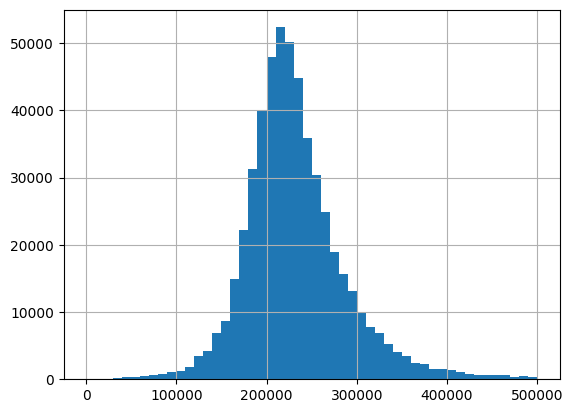

In [ ]:
##4
song['duration_ms'].hist(bins=50)

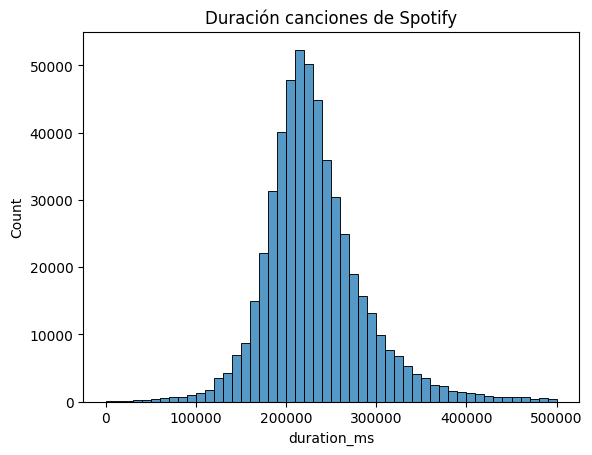

In [6]:
##5
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=song, x="duration_ms",bins=50)
plt.title("Duración canciones de Spotify")
plt.show()

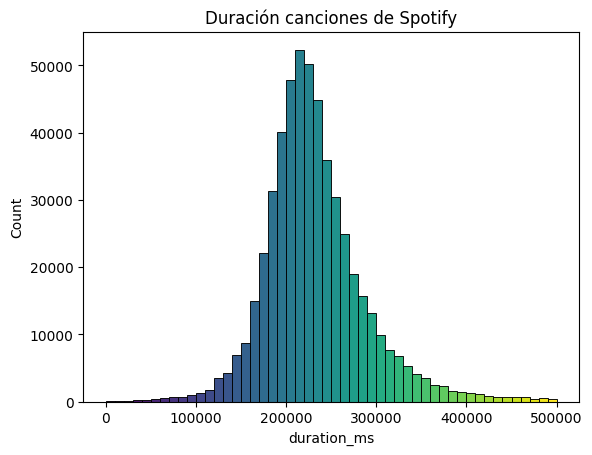

In [7]:
import numpy as np
# Crear el histograma básico
sns.histplot(song, x="duration_ms",bins=50, kde=False, color='blue')

# Obtener los ejes actuales
ax = plt.gca()

# Obtener los patches (barras del histograma)
patches = ax.patches

# Crear una lista de colores en degradado
colors = plt.cm.viridis(np.linspace(0, 1, len(patches)))

# Asignar los colores en degradado a cada barra del histograma
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Mostrar el histograma
plt.title("Duración canciones de Spotify")
plt.show()

In [ ]:


220000/(1000*60)

3.6666666666666665

##Análisis pregunta 1

¿Cómo es la distribución de la duración de las canciones en todas las playlists?

Los histogramas muestran la distribución de una variable continua para poder encontrar las tendencias en esta. La variable continua de este gráfico es la duración de las canciones de todas las playlists, y lo que nos está mostrando este gráfico es que la mayoría de estas canciones tienen una duración entre los 190,0000 y y 240,000 milisegundos. Lo que equivale a una duración entre los 3,16 y 4 minutos. Igualmente, se puede observar que entre más decrece la duración en minutos de los 3,16, o aumenta de los 4, la cantidad de canciones con estas duraciones decrece también. Finalmente, podemos observar con el pico del gráfico que el grupo mayoritario de canciones con duraciones más similares entre sí tiene una duración aproximada entre los 210,000 y los 220,000 milisegundos. Es decir, que la gran mayoría de las canciones (más de 50,000 entre todas las canciones de todas las playlists) tiene una duración aproximada entre los 3,5min y 3,66min.

##PREGUNTA 2
¿Cuál es la relación entre la cantidad de artistas de una playlist y su respectiva cantidad de álbumes?

Tipo de gráfico: Scatter plot (de relación)

1) Pedí que me mostrara los primeros datos de la tabla de playlists para saber cuáles datos seleccionar, utilizando la variable "datos" que construí anteriormente con una consulta SQL

2 y 3) Copié la instrucción de la guía semanal sobre cómo hacer scatter plots: sns.relplot(data=car_crash,x='total',y='alcohol', hue  = 'speeding') y reemplacé los datos según las columnas de la tabla de playlists que me servían: num_albums y num_artists. Primero hice la tabla sin cambiar la distribución por colores, pero luego añadí que el color se distribuyera según una variable adicional: la duración de las playlists. Así, puedo ver no sólo la relación entre cantidad de artistas y álbumes, sino también entre estas y la duración de las playlists.

4) Luego, como me cuesta tanto leer la duración en variable de milisegundos, transformé los milisegundos a horas, y volví a correr la tabla pero cambiando duration_ms por duration_hours que es la variable en la que cambié a horas.

5) Finalmente, añadí un título a la tabla y cambié la paleta de colores predeterminada a 'vlag'.


In [ ]:
##1
datos.head()

,slice,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
0,0-999,0,1493424000,52,47,1,6,11532414,37
1,0-999,1,1506556800,39,23,1,5,11656470,21
2,0-999,2,1505692800,64,51,1,18,14039958,31
3,0-999,3,1501027200,126,107,1,4,28926058,86
4,0-999,4,1401667200,17,16,2,7,4335282,16


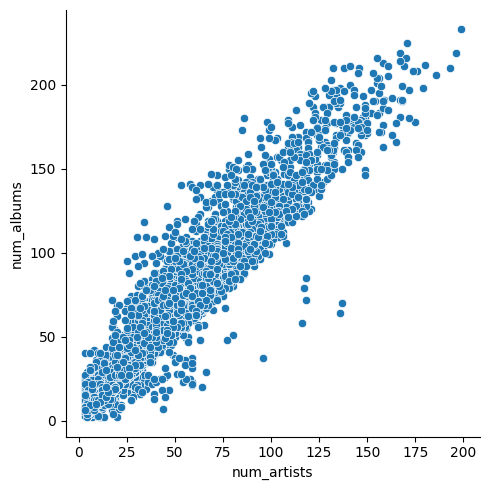

In [ ]:
##2
sns.relplot(data=datos,x='num_artists',y='num_albums')

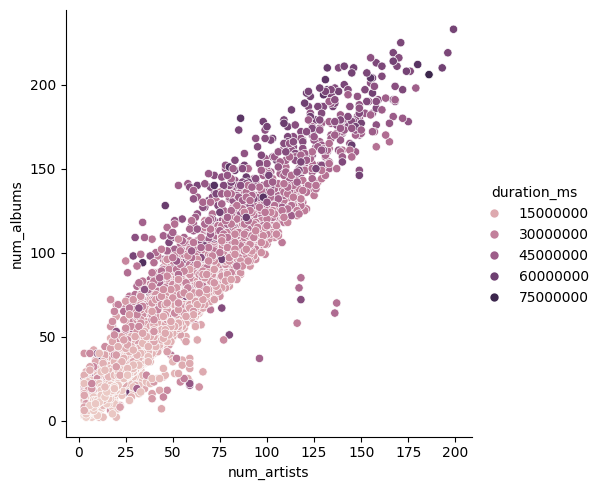

In [ ]:
##3
sns.relplot(data=datos,x='num_artists',y='num_albums', hue= 'duration_ms')


In [ ]:
##4
datos['duration_hours']=datos['duration_ms']/(3600000)

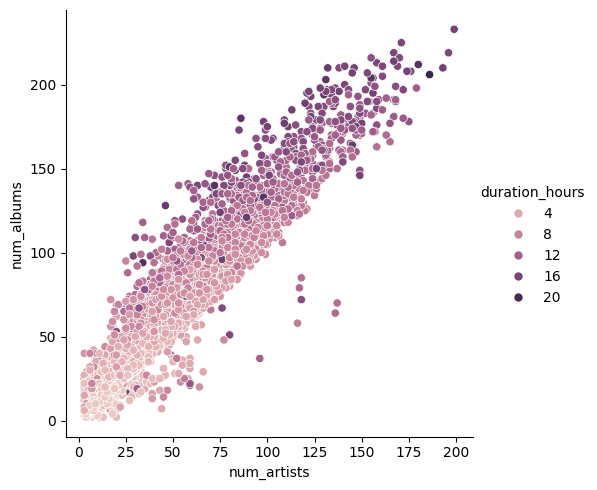

In [ ]:
##5
sns.relplot(data=datos,x='num_artists',y='num_albums', hue= 'duration_hours')


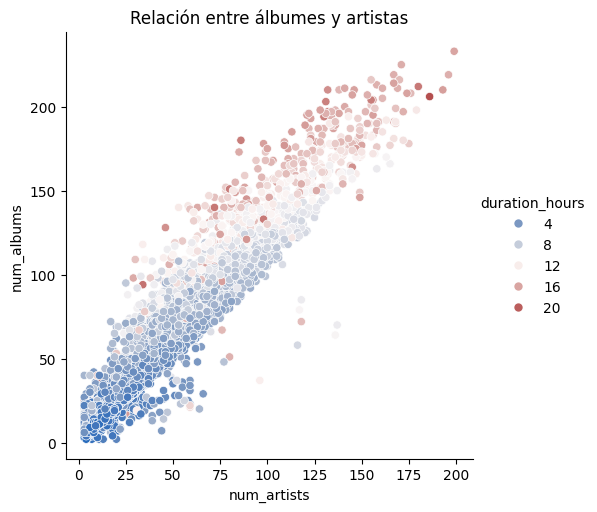

In [ ]:
sns.relplot(data=datos,x='num_artists',y='num_albums', hue= 'duration_hours', palette='vlag')
plt.title("Relación entre álbumes y artistas")
plt.show()


##Análisis pregunta 2
¿Cuál es la relación entre la cantidad de artistas de una playlist y su respectiva cantidad de álbumes?

Los gráficos de relación, y en específico un scatter plot como el realizado, se utilizan para encontrar la intensidad de una relación entre una variable independiente y otra dependiente. La intensidad determina si las relaciones entre variables son inexistentes o poco probables, tendenciales o muy probables, o proporcionales y constantes. Este gráfico de relación nos permite ver que entre más artistas tiene una playlists (variable x independiente), a mayor cantidad de álbumes pertenecen las canciones (variable y dependiente), pues la diversidad de artistas implica canciones de orígenes diferentes. De hecho, la forma lineal en la que se organizan los resultados dentro del gráfico nos permite ver esta relación no sólo como una tendencia, sino como una proporción: el número total de álbumes en una playlist es proporcional a su número de artistas, implicando que, probablemente, cada canción de un artista diferente, tiene un álbum diferente, incluso para el mismo artista. Además, la tercera variable que añadí respecto de la distribución de colores lo que nos indica es la duración de las canciones dispuestas en el gráfico. Con esto, encontramos otra relación, pero no proporcional, sino tendencial: a mayor duración de las playlists, mayor suele ser su número de álbumes y artistas. Nuevamente, porque esta diversidad de artistas asegura diversidad en canciones con orígenes diferentes y la cantidad de estas escuchada.

## PREGUNTA 3

 ¿Cuáles son los 10 artistas que están en más número de playlists?

 Tipo de gráfico: Barras (categórico)

 1. Pedí que me mostrara la tabla de song para saber cuáles son las variables que necesito agrupar. Estas son: el playlist id (pid) y el artist_name

 2. Luego, con una consulta SQL, pedí que me seleccionara y agrupara los primeros 10 artistas y contando el número de playlists en las que aparecen, en orden descendente, obteniendo la información de la tabla de song.
 3. Después, pedí que me mostrara cómo se veían esos datos para verificar que estuviera bien.
 4. Copié y pegué el código de la guía del curso para hacer un gráfico de barras (categórico)
 5. Como no se veían los nombres claramente en el gráfico le pedí a chat gpt que lo arreglara y pegué el código que me indicó.
 6. Añadí título al gráfico y cambié la paleta de colores por "icefire" para que se viera más coquette.

In [12]:
##1
song

,track_uri,pid,pos,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name
0,spotify:track:4SDywo3ykB2PEthjXvo1UP,6,0,Creedence Clearwater Revival,spotify:artist:3IYUhFvPQItj6xySrBmZkd,I Put A Spell On You,spotify:album:7oIftk0P8cViwNpNEdCYl2,271786,Creedence Clearwater Revival
1,spotify:track:229SqGbacrLSBfb9XfJczF,6,1,STRFKR,spotify:artist:2Tz1DTzVJ5Gyh8ZwVr6ekU,Bury Us Alive,spotify:album:5pfqk4oFycMVynOD8S2Cqs,190360,Reptilians
2,spotify:track:0orNm6qQT2B5WFi0l7l3PV,6,2,311,spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K,Jackolantern's Weather,spotify:album:6VIeIM5tetuv7FrYxISffU,204160,311
3,spotify:track:1hWQvA6oGVJ2mAVsZ59AaV,6,3,Nathaniel Rateliff & The Night Sweats,spotify:artist:02seUFsFQP7TH4hLrTj77o,S.O.B.,spotify:album:2UCyiayMoJOwBilPLQPQvK,247612,Nathaniel Rateliff & The Night Sweats
4,spotify:track:56SkdBKyR2zOkjk6wVFI9s,6,4,Toadies,spotify:artist:2QMMktUMtwMSwUZATX1cRO,Possum Kingdom,spotify:album:7tFTqVGHceSlXOaz8IylBN,309573,Rubberneck
...,...,...,...,...,...,...,...,...,...
525601,spotify:track:0ToIU1A4H4QsuNEwPj1ljr,10995,52,Blood Orange,spotify:artist:6LEeAFiJF8OuPx747e1wxR,Juicy 1-4,spotify:album:3Z2XUjgVj5ZkCGpU7b2qtY,275956,Freetown Sound
525602,spotify:track:0S001mAQoYNpTyVRu8BmMp,10995,53,Blood Orange,spotify:artist:6LEeAFiJF8OuPx747e1wxR,Better Than Me,spotify:album:3Z2XUjgVj5ZkCGpU7b2qtY,196851,Freetown Sound
525603,spotify:track:1kAcUQO9bBz5c4zwIXIGMO,10995,54,Blood Orange,spotify:artist:6LEeAFiJF8OuPx747e1wxR,Thank You,spotify:album:3Z2XUjgVj5ZkCGpU7b2qtY,183561,Freetown Sound
525604,spotify:track:32gJ6tgfi1TQGpaOXGq5se,10995,55,Blood Orange,spotify:artist:6LEeAFiJF8OuPx747e1wxR,I Know,spotify:album:3Z2XUjgVj5ZkCGpU7b2qtY,274887,Freetown Sound


In [19]:
##2
query='SELECT artist_name, COUNT(pid) as num_playlists_per_artist FROM song GROUP BY artist_name ORDER BY num_playlists_per_artist desc LIMIT 10'
datos3= pd.read_sql_query(query, connection)

In [21]:
##3
datos3.head(10)


,artist_name,num_playlists_per_artist
0,Drake,6821
1,Kanye West,3311
2,Rihanna,2743
3,Kendrick Lamar,2695
4,The Weeknd,2403
5,Ed Sheeran,2252
6,Eminem,1987
7,The Chainsmokers,1920
8,Future,1915
9,Beyoncé,1862


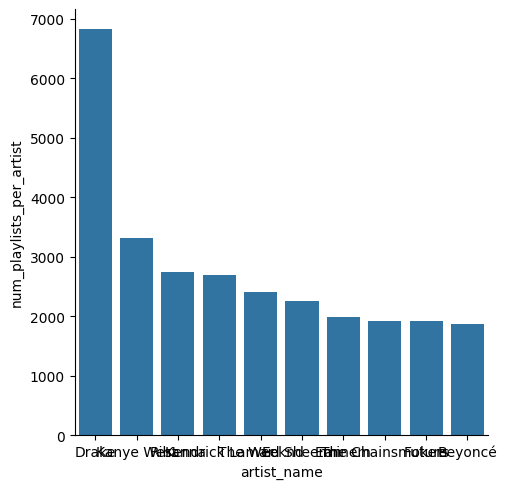

In [22]:
##4
sns.catplot(data=datos3, x="artist_name", y="num_playlists_per_artist", kind="bar")

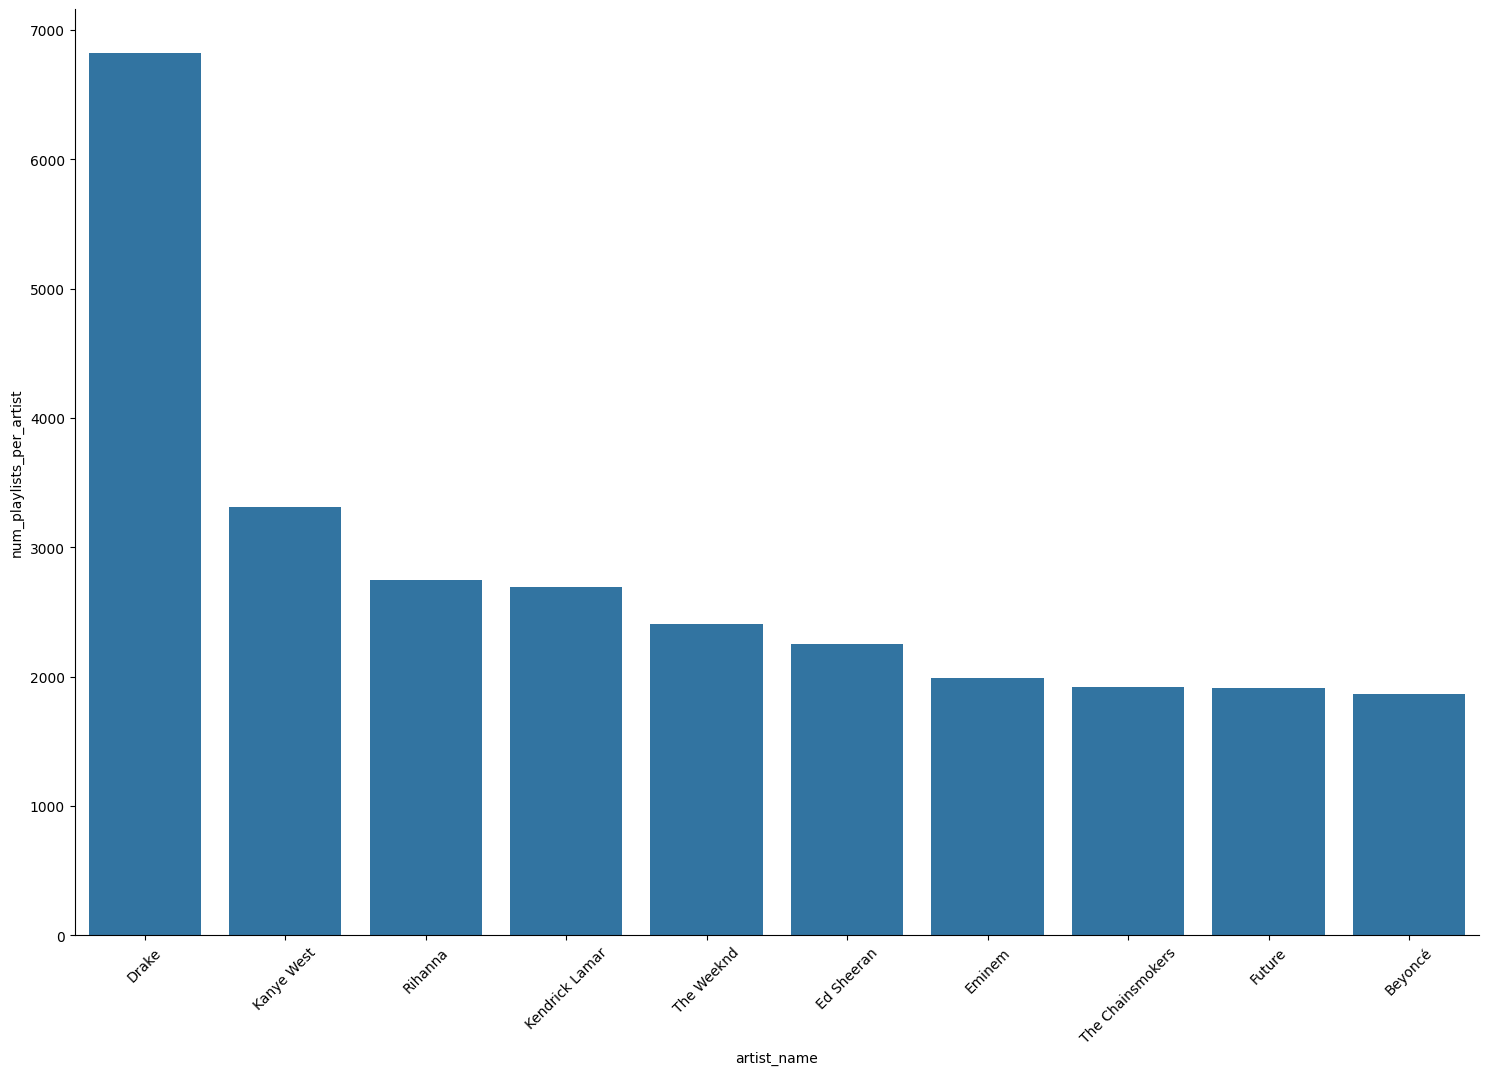

In [27]:
##5
catplot = sns.catplot(data=datos3, x="artist_name", y="num_playlists_per_artist", kind="bar", height=10, aspect=1.5)

# Rotate x-ticks
catplot.set_xticklabels(rotation=45)

# Show the plot
plt.show()


<ipython-input-32-6f3ac1895a64>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  catplot = sns.catplot(data=datos3, x="artist_name", y="num_playlists_per_artist", kind="bar", height=10, aspect=1.5, palette='icefire')


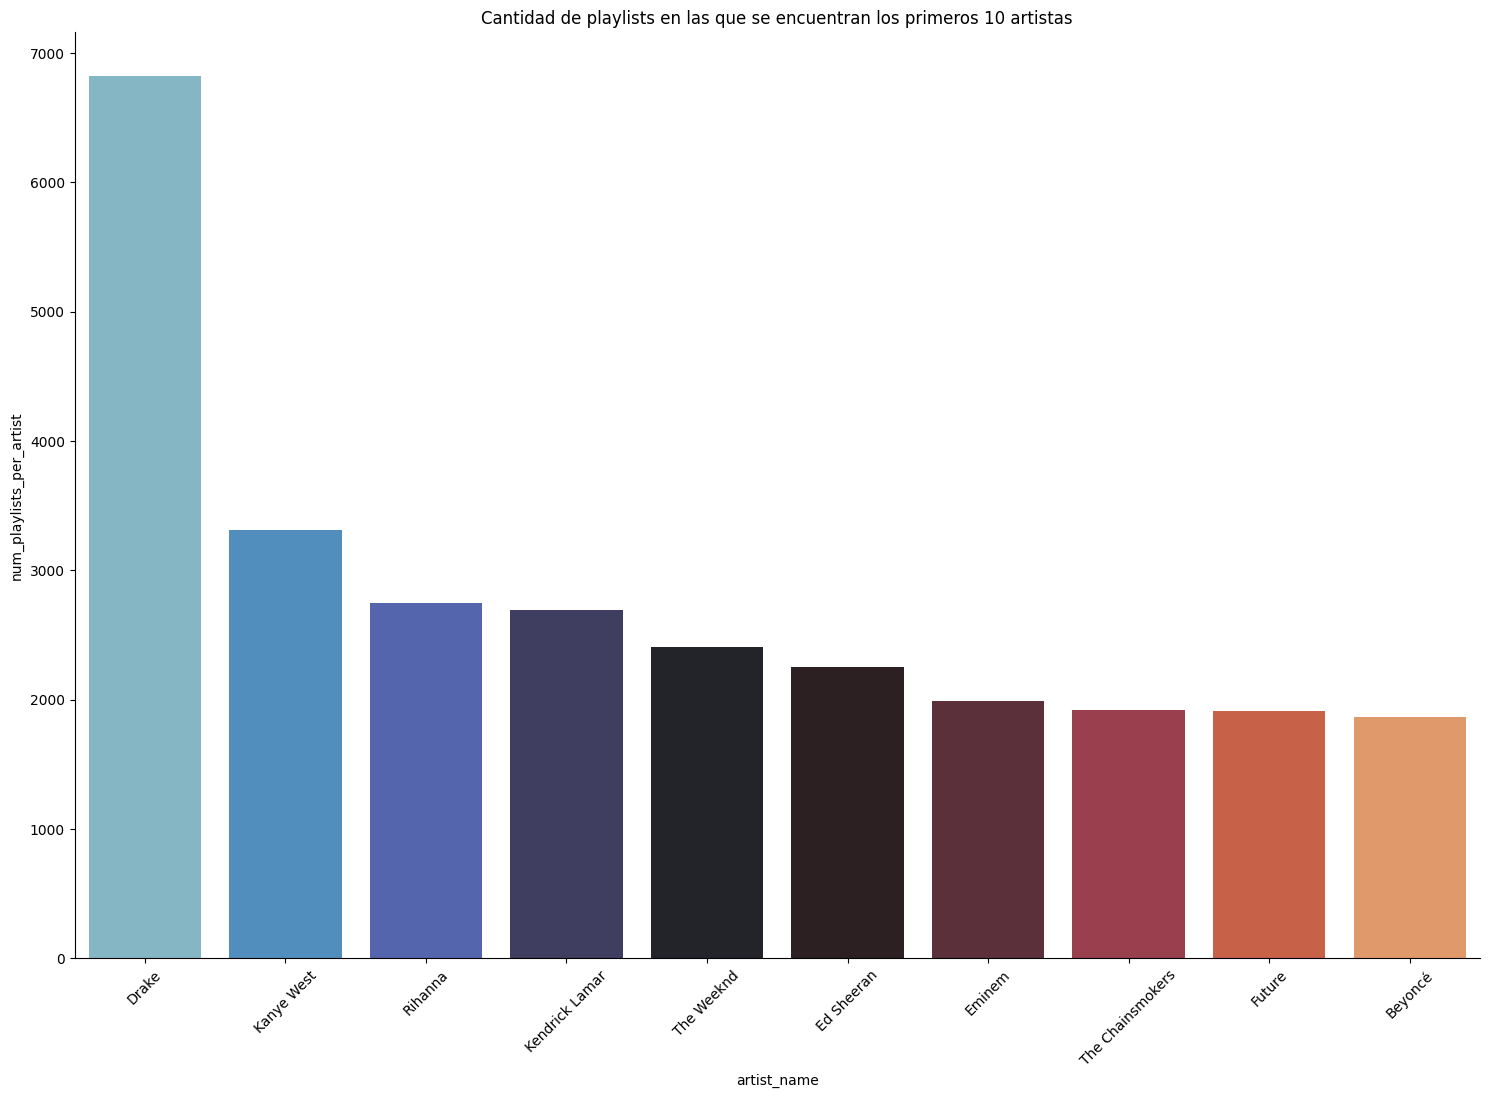

In [32]:
##6
catplot = sns.catplot(data=datos3, x="artist_name", y="num_playlists_per_artist", kind="bar", height=10, aspect=1.5, palette='icefire')

# Rotate x-ticks
catplot.set_xticklabels(rotation=45)

# Show the plot

plt.title("Cantidad de playlists en las que se encuentran los primeros 10 artistas")
plt.show()

## Análisis pregunta 3

 ¿Cuáles son los 10 artistas que están en más número de playlists?

 Los gráficos categóricos, como el representado de barras, nos ayudan a comparar categorías de datos, analizar distribuciones, identificar tendencias y, para lo que más sirve el realizado en esta pregunta, destacar valores atípicos como los máximos y mínimos frente a alguna situación. En este caso, el gráfico de barras nos está mostrando los valores mayores de los primeros 10 artistas que se encuentran en mayor número de playlists. Estos son, en su orden respectivo: Drake, Kanye West, Rihanna, Kendrick Lamar, The Weeknd, Ed Sheeran, Eminem, The Chainsmokers, Future y Beyonce. Artistas que en su conjunto, por lo demás, fueron muy populares entre 2015 y 2017. En próximas investigaciones valdría la pena estudiar de qué año son las playlists en las que se encuentran para ver si hay una correlación entre el momento histórico y su popularidad.


## PREGUNTA 4

¿Cuál es la correlación entre el número de álbumes en una playlist, su cantidad de ediciones y su duración en minutos?

Tipo de gráfico: Cluster map (Matriz)

1. Primero, hice un query para que me seleccionara las tres variables que necesitaba (num_albums, num_edits , y duration_ms/(1000*60)) de la tabla de Playlists y las ordenara en la tabla de datos4.
2. Posteriormente, pedí que me mostrara los primeros 10 datos de la tabla de datos4 para verificar que estuviera bien.
3. Por último, copié y pegué las instrucciones de la guía semananal sobre cómo hacer Surface Plots reemplazando la tabla de penguins por datos4 y las variables x, y y z, por las mencionadas anteriormente. También, añadí un título y cambié la paleta de colores a hot_r. Spicyyy.

In [41]:
##1
query= 'SELECT num_albums, num_edits , duration_ms/(1000*60) as duration_min FROM playlists'
datos4= pd.read_sql_query(query, connection)


In [42]:
##2
datos4.head(10)

,num_albums,num_edits,duration_min
0,47,6,192
1,23,5,194
2,51,18,233
3,107,4,482
4,16,7,72
5,71,3,319
6,15,2,56
7,52,38,211
8,37,21,165
9,20,10,71


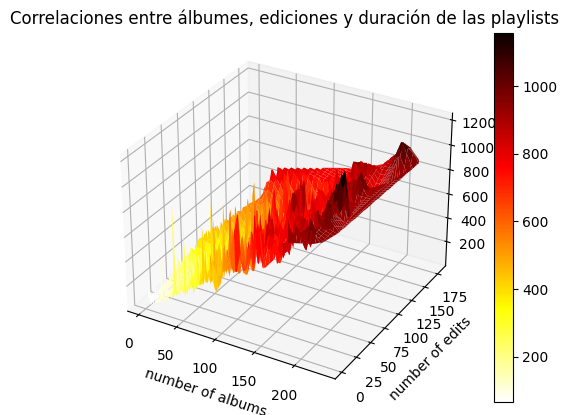

In [47]:
##3

# Preparar datos: vamos a usar 'bill_length_mm', 'bill_depth_mm' y 'body_mass_g'
x = datos4['num_albums']
y = datos4['num_edits']
z = datos4['duration_min']

# Crear una malla de puntos
x, y = np.meshgrid(np.linspace(x.min(), x.max(), len(x.unique())),
                   np.linspace(y.min(), y.max(), len(y.unique())))

# Ajustar una superficie: z = f(x, y)
# Por simplicidad, usaremos una interpolación lineal aquí para los valores de z
from scipy.interpolate import griddata
z = griddata((datos4['num_albums'], datos4['num_edits']), datos4['duration_min'], (x, y), method='linear')

# Crear la figura y el eje para un gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar el gráfico de superficie
surf = ax.plot_surface(x, y, z, cmap='hot_r')

# Añadir una barra de color que mapea los valores a colores
fig.colorbar(surf)

plt.title('Correlaciones entre álbumes, ediciones y duración de las playlists')
plt.xlabel('number of albums')
plt.ylabel('number of edits')
ax.set_zlabel('duration in minutes')
plt.show()


## Análisis pregunta 4
¿Cuál es la correlación entre el número de álbumes en una playlist, su cantidad de ediciones y su duración en minutos?

Los Surface plots nos sirven para identificar las relaciones entre tres variables. En este caso, quería ver la relación entre el número de álbums en una playlist, su numero de ediciones y la duración de las playlists. A primera vista, parece haber una relación entre las variables, siendo que todas coinciden cuando son menores, medianas y mayores. Sin embargo, cuando se observa la gráfica en detalle se ve que la relación proporcional es entre las primeras variables X y Y en un plano bidimensional. De esto se concluye que, a mayor número de álbumes, mayor número de ediciones tiene una playlist, probablemente por la cantidad alta de canciones que debe tener, por la relación que vimos en la pregunta 2 entre el número de canciones y el número de álbums y artistas en una playlist.

Por otra parte, la duración de estas playlists que es la que vuelve tridimensional la gráfica, no obstante, no parece tener una relación proporcional y constante con ninguna de las anteriores dos variables. Esto es evidente por cómo varían los picos de color en cada sección del gráfico, en vez de seguir un cambio lineal del color, como lo sería el degradé de la escala. Ahora bien, sí es cierto que parece haber una menor duración entre menos álbumes y ediciones tiene (probablemente porque tengan menos canciones esas playlists) y una mayor duración cuando hay más número de álbumes y ediciones (porque tienen más canciones). El problema está en cuando el número de álbumes y ediciones se encuentra en el promedio y, entonces, estos picos varían demasiado. De cualquier manera, se puede concluir que esta relación de la tercera variable, con las primeras dos, es apenas tendencial y probable, pero no exacta, mientras sí existe una relación proporcional y constante entre las primeras dos.

## PREGUNTA 5

¿Existe una relación entre las canciones y tanto su posición promedio dentro de las playlists, como la cantidad de playlists en la que aparecen?

Tipo de gráfico: Regresión

1. Realicé un query en el que me seleccionara el nombre de una canción, contara la cantidad de playlists en las que sale esa canción, y sacara el promedio de posición de cada canción en todas las playlists en la que aparece en la tabla de song, agrupando los resultados bajo la variable independiente del nombre de cada canción
2. Pedí que me mostrara los primeros 5 resultados de la tabla realizada en el Query que nombré como datos5

3.  Copié y pegué de la guía semanal la instrucción de cómo hacer una gráfica de regresión y reemplacé las variables por las indicadas en mi query

4. Añadí un título y cambié la paleta de colores por una pastel con la ayuda de GPT

In [83]:
##1
query='SELECT track_name, COUNT(pid) as num_playlists_per_song, AVG(pos) as avg_song_position_in_playlist FROM song GROUP BY track_name'
datos5= pd.read_sql_query(query, connection)

In [84]:
##2
datos5.head(5)

,track_name,num_playlists_per_song,avg_song_position_in_playlist
0,""" Frühlingssinfonie "" , Sinfonie Nr. 1, B-Dur,...",1,8.0
1,"""40"" - Remastered 2008",2,11.0
2,"""45""",6,61.0
3,"""A Far Green Country""",1,74.0
4,"""A Lovely Night""",2,148.5


<Axes: xlabel='num_playlists_per_song', ylabel='avg_song_position_in_playlist'>

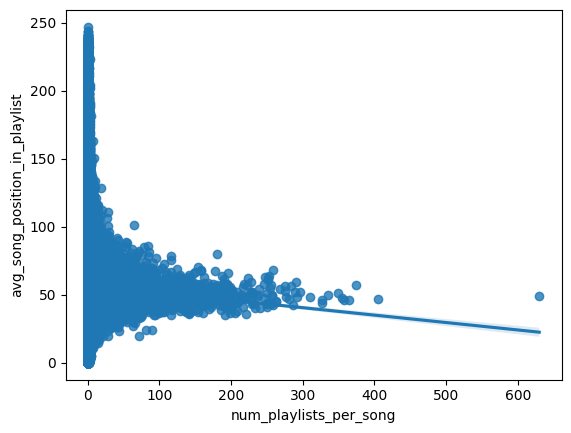

In [87]:
##3
sns.regplot(x="num_playlists_per_song", y="avg_song_position_in_playlist", data=datos5)

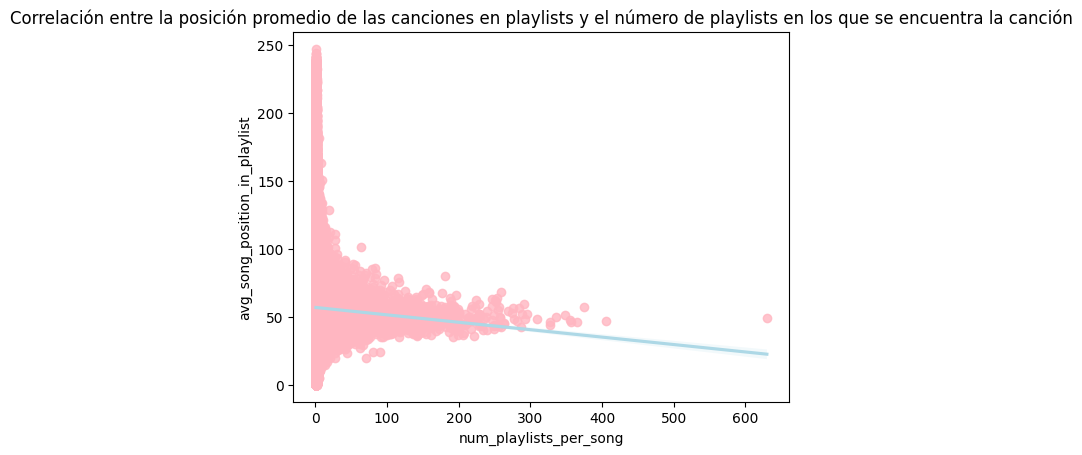

In [86]:
##4
sns.regplot(x="num_playlists_per_song", y="avg_song_position_in_playlist", data=datos5, scatter_kws={'color': 'lightpink'}, line_kws={'color': 'lightblue'});
plt.title("Correlación entre la posición promedio de las canciones en playlists y el número de playlists en los que se encuentra la canción")
plt.show()

## Análisis pregunta 5

¿Existe una relación entre las canciones y tanto su posición promedio dentro de las playlists, como la cantidad de playlists en la que aparecen?

Los gráficos de regresión se suelen utilizar para comprender cómo el cambio de una variable independiente influye en una, o más, variables dependientes.En este caso la variable independiente era cada canción, mientras las variables dependientes eran su posición promedio en las playlists, y la cantidad de playlists en las que aparecen. Esta pregunta la realicé porque creía que, dependiendo de la canción, esta sería más o menos popular entre una mayor cantidad de personas y esto se evidenciaría al estar en las primeras posiciones dentro de las playlists, así como aparecer en una mayor cantidad de estas. Sin embargo, el gráfico parece mostrar que no hay una relación significativa entre estas dos variables dependientes con la independiente. Por un lado, las canciones se distribuyen sin seguir un patrón constante entre las variables de la posición promedio y la cantidad de playlists en la que están. Una mayor cantidad de estas se encuentra cerca de aparecer cero veces en diferentes playlists, ocupando posiciones muy diversas. Viendo los datos donde se encuentra la mayor distribución es evidente que no hay correlación significativa entre la mayoría de los datos independientes con las dependientes. Por otro lado, la línea azul nos muestra la tendencia mediana de cambio entre estos datos. Esta indica, aunque muy mínimamente, que de alguna manera entre más veces aparece una canción en las playlists, menor se vuelve su posición, pero en una escala de cambios muy pequeña. De ahí que, aunque sí parezca haber una relación entre la canción y cómo su popularidad afecta su posición promedio y cantidad de apariciones por la línea mediana, la tendencia se da en escalas de cambio muy pequeñas, por lo que no pueden hacerse aseveraciones completamente certeras de esta relación.

##AGRADECIMIENTO

Sin más que realizar para esta actividad, te agradezco Carlos por toda la ayuda y paciencia en enseñarnos algunas cosas básicas de programación. Quizás no sea ni vaya a ser una experta, pero me puedo defender en un par de cosas, y eso ya es mucho para mí cuando siempre me han costado los temas relacionados con habilidades computacionales. Muchas gracias de verdad :).